In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score

In [ ]:
from ucimlrepo import fetch_ucirepo

metro_interstate_traffic_volume = fetch_ucirepo(id=492)

X = metro_interstate_traffic_volume.data.features
y = metro_interstate_traffic_volume.data.targets

In [ ]:
y.describe()

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


In [ ]:
print(metro_interstate_traffic_volume.metadata)

print(metro_interstate_traffic_volume.variables)

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

Text(0, 0.5, 'Traffic Volume')

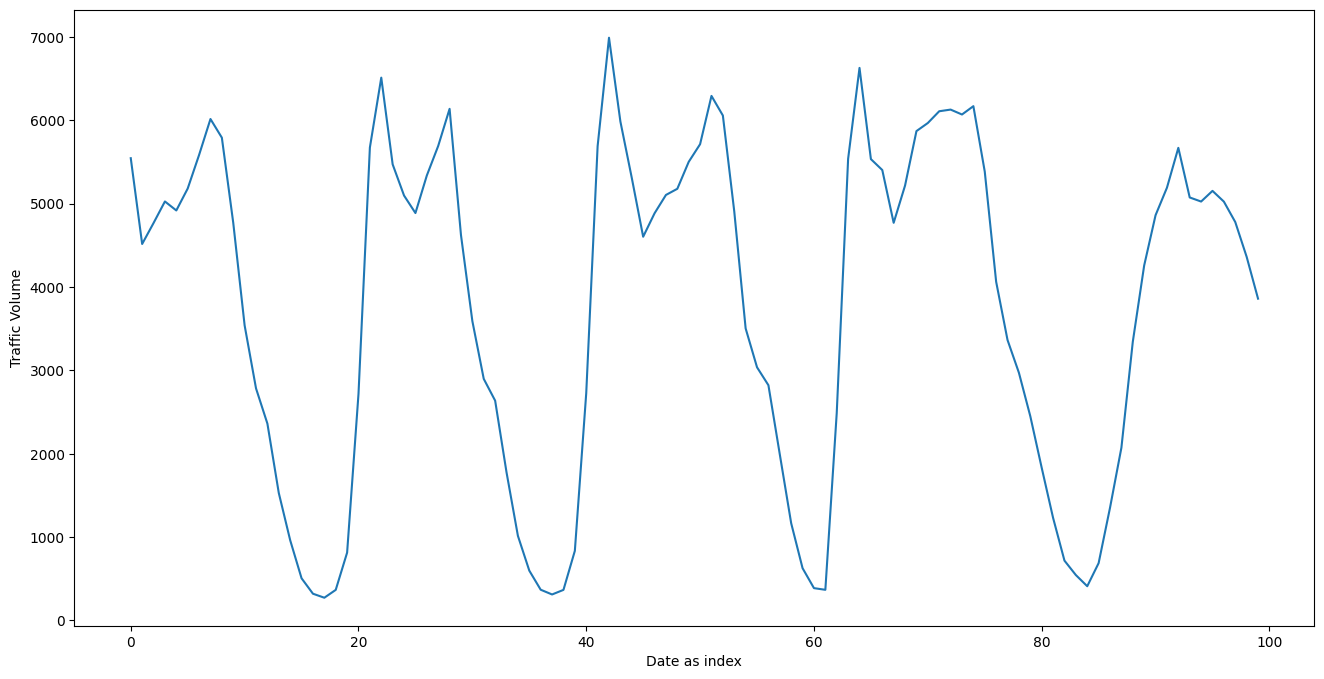

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(y[:100])
plt.xlabel('Date as index')
plt.ylabel('Traffic Volume')

In [ ]:
#data copy

X_copy = X.copy()
y_copy = y.copy()

In [ ]:
X_copy['date_time'] = pd.to_datetime(X_copy['date_time'])
X_copy['day_of_week'] = X_copy['date_time'].dt.day_name()
X_copy['time'] = X_copy['date_time'].dt.time
X_copy.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,time
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Tuesday,09:00:00
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Tuesday,10:00:00
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Tuesday,11:00:00


In [ ]:
categorical_cols = ['holiday', 'weather_main', 'weather_description', 'day_of_week', 'time']

encoder = OneHotEncoder(sparse=False)

encoded_cols = encoder.fit_transform(X_copy[categorical_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

X_copy.drop(columns=categorical_cols, inplace=True)

X_copy = pd.concat([X_copy, encoded_df], axis=1)

X_copy.tail(3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,temp,rain_1h,snow_1h,clouds_all,date_time,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
48201,282.73,0.0,0.0,90,2018-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48202,282.09,0.0,0.0,90,2018-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48203,282.12,0.0,0.0,90,2018-09-30 23:00:00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_copy['clouds_all'] = X_copy['clouds_all'] / 100

In [ ]:
X_copy = X_copy.drop(['date_time'], axis=1)

In [ ]:
X_copy.fillna(0, inplace = True)

In [ ]:
X_copy.drop('temp', axis =1, inplace = True)

In [ ]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy,y_copy, test_size= 0.3, shuffle = False, random_state = 42)

In [ ]:
num_col = ['rain_1h', 'snow_1h', 'clouds_all']
scaler = StandardScaler()
scaled_train_num_col = pd.DataFrame(scaler.fit_transform(X_train[num_col]), columns=num_col)
scaled_test_num_col = pd.DataFrame(scaler.fit_transform(X_test[num_col]), columns=num_col)

In [ ]:
scaled_test_num_col.set_index(X_test.index, inplace = True)

In [ ]:
X_train[num_col] = scaled_train_num_col
X_test[num_col] = scaled_test_num_col

In [ ]:
#KNN accuracy for multiple n_neighbour values

knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)


     K  Test Score  Train Score
0    1    0.824078     0.907220
1    2    0.854384     0.920396
2    3    0.855855     0.920844
3    4    0.854839     0.916877
4    5    0.851066     0.912644
5    6    0.849983     0.907619
6    7    0.846611     0.901460
7    8    0.843763     0.896801
8    9    0.839218     0.891327
9   10    0.835784     0.884614
10  11    0.833009     0.879014
11  12    0.828846     0.872825
12  13    0.825158     0.866143
13  14    0.820126     0.859442
14  15    0.815820     0.852027
15  16    0.810626     0.845448


In [ ]:
#knn neighbours

knn = KNeighborsRegressor(n_neighbors=3, weights='distance').fit(X_train, y_train)

pred = knn.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(pred)

In [ ]:
pred_df = pred_df.set_index(y_test.index)

In [ ]:
pred_df.tail(5)

In [ ]:
#mse and mae of KNN model

mse_knn = mean_squared_error(y_test, pred_df)

mse_knn

507122.52454018715

In [ ]:
mae_knn = mean_absolute_error(y_test, pred_df)

mae_knn

406.0340806888003

In [ ]:
knn_score = r2_score(y_test, pred_df)
print(f"The accuracy of the KNN model is {round(knn_score, 2) *100}%")

The accuracy of the KNN model is 87.0%


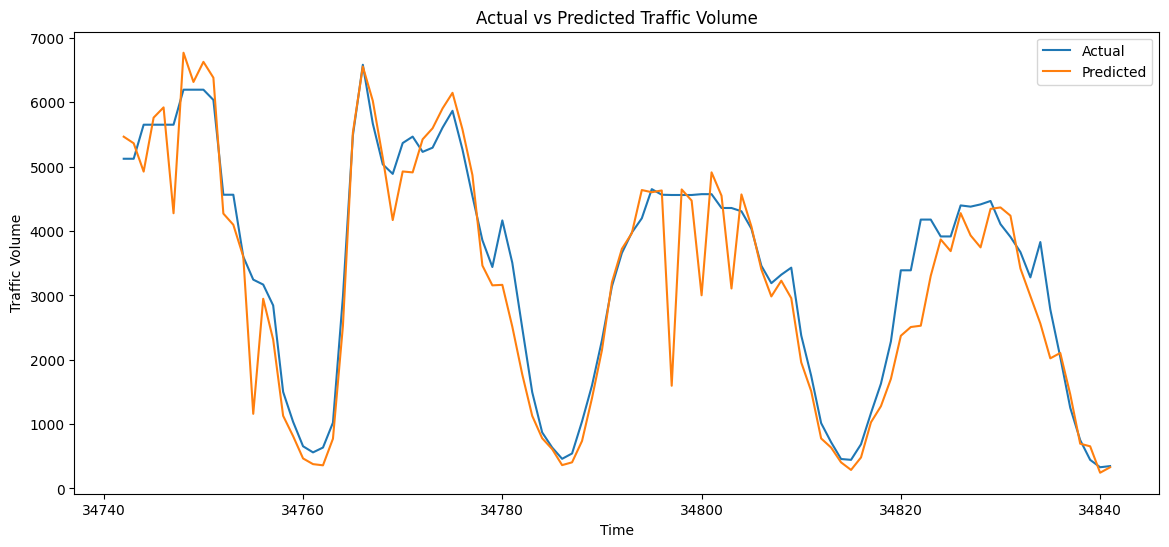

In [ ]:
# actual vs predicted for KNN
plt.figure(figsize=(14, 6))
plt.plot(y_test[1000:1100], label='Actual')
plt.plot(pred_df[1000:1100], label='Predicted')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [ ]:
#linear regression

lr = LinearRegression().fit(X_train, y_train)

lr_pred = lr.predict(X_test)

In [ ]:
lr_df = pd.DataFrame(lr_pred)

lr_df = lr_df.set_index(y_test.index)

In [ ]:
lr_df.tail(5)

In [ ]:
#mse and mae of LR model

mse_lr = mean_squared_error(y_test, lr_df)

mse_lr

657918.5413977553

In [ ]:
mae_lr = mean_absolute_error(y_test, lr_df)

mae_lr

590.1752847980915

In [ ]:
lr_score = r2_score(y_test, lr_df)
print(f"The accuracy of the LR model is {round(lr_score, 2) *100}%")

The accuracy of the LR model is 83.0%


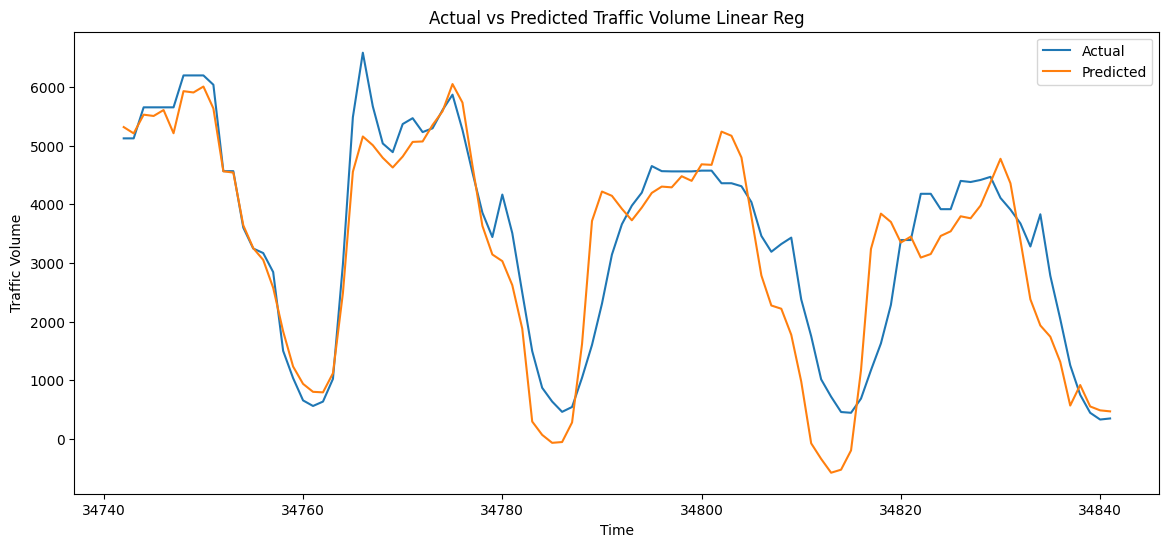

In [ ]:
# actual vs predicted for LR
plt.figure(figsize=(14, 6))
plt.plot(y_test[1000:1100], label='Actual')
plt.plot(lr_df[1000:1100], label='Predicted')
plt.title('Actual vs Predicted Traffic Volume Linear Reg')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [ ]:
#random forest

rf = RandomForestRegressor(n_estimators = 300, random_state=2).fit(X_train, y_train)

<ipython-input-32-6b24466f3de5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators = 300, random_state=2).fit(X_train, y_train)


In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_df = pd.DataFrame(rf_pred)

In [ ]:
rf_df = rf_df.set_index([y_test.index])

In [ ]:
rf_df.tail(5)

In [ ]:
#accuracy rf

mae_rf = mean_absolute_error(y_test, rf_df)

mae_rf

315.43490225016654

In [ ]:
mse_rf = mean_squared_error(y_test, rf_df)

mse_rf

317751.6798587654

In [ ]:
rf_score = r2_score(y_test, rf_df)
print(f"The accuracy of the RF model is {round(rf_score, 2) *100}%")

The accuracy of the RF model is 92.0%


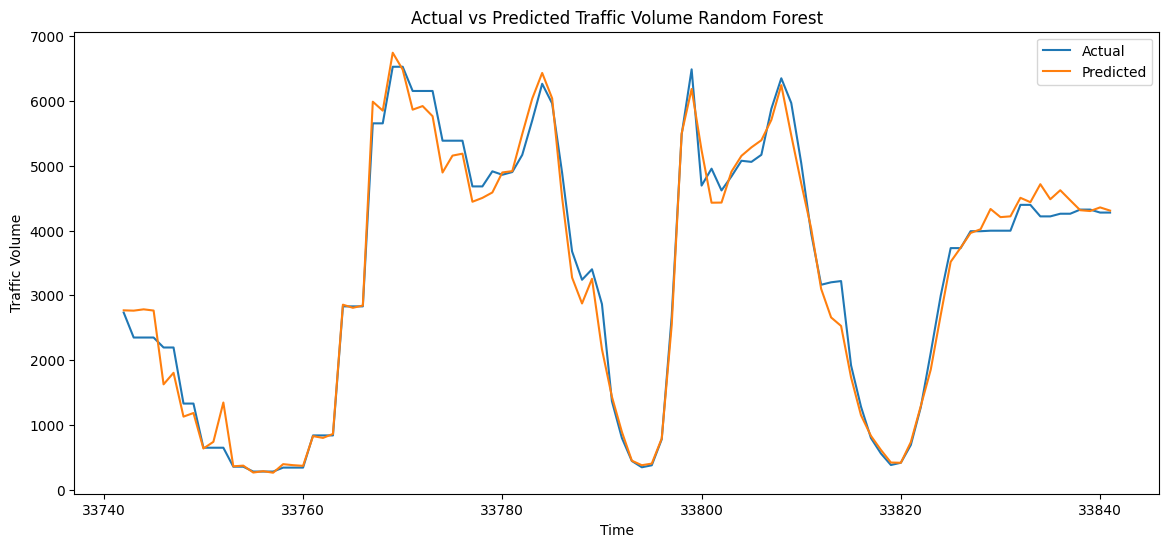

In [ ]:
# actual vs predicted for RF
plt.figure(figsize=(14, 6))
plt.plot(y_test[:100], label='Actual')
plt.plot(rf_df[:100], label='Predicted')
plt.title('Actual vs Predicted Traffic Volume Random Forest')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


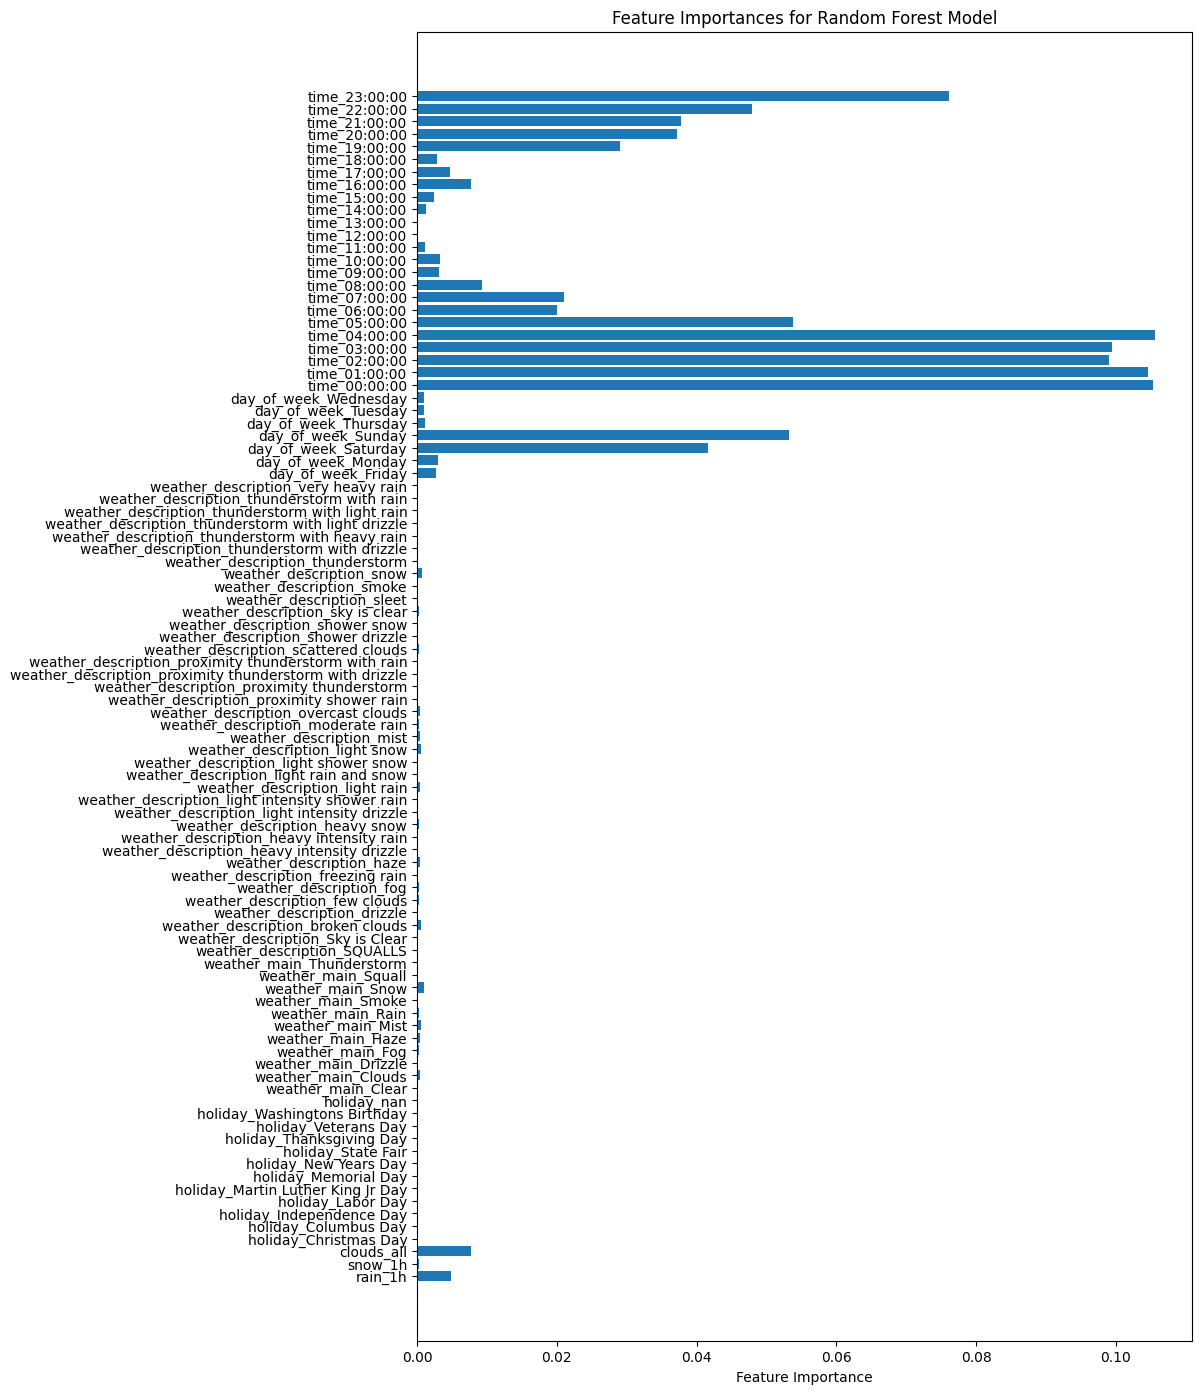

In [ ]:
importances = rf.feature_importances_
features = X_copy.columns

plt.figure(figsize=(10, 17))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Random Forest Model')
plt.show()
